In [1]:
import numpy as np
import scipy.constants
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime
import math
import h5py
import os
import CDO

from DREAM.DREAMOutput import DREAMOutput
plt.rcParams.update({'font.size': 14})

In [17]:
def basic_1D(figsize=[8,4], ydata=None, xdata=None, ylabel=None, xlabel=None, 
             title=None, yscale="linear", ymin=None, ymax=None, savename=None):
    
    fig = plt.figure(figsize=figsize)
    plt.plot(xdata, ydata, drawstyle="steps-mid")
    axes = plt.gca()
    axes.set_yscale(yscale)
    axes.set_ylim([ymin, ymax])
    axes.set_ylabel(ylabel)
    axes.set_xlabel(xlabel)
    axes.grid()
    plt.title(title)
    plt.tight_layout()
    
    if savename:
        now = datetime.datetime.now()
        date_time = now.strftime("_%Y-%m-%d_%Hh-%Mm-%Ss")
        plt.savefig(savename + date_time + ".png", dpi=150)
        
def plot_2things(figsize=[8,4], ydata1=None, ydata2=None, xdata=None, ylabel=None, 
                 xlabel=None, y1label=None, y2label=None,
                 title=None, yscale="linear", ymin=None, ymax=None, savename=None):
    
    fig = plt.figure(figsize=figsize)
    plt.plot(xdata, ydata1, drawstyle="steps-mid", label=y1label)
    plt.plot(xdata, ydata2, drawstyle="steps-mid", label=y2label)
    axes = plt.gca()
    axes.set_yscale(yscale)
    axes.set_ylim([ymin, ymax])
    axes.set_ylabel(ylabel)
    axes.set_xlabel(xlabel)
    axes.grid()
    axes.legend()
    plt.title(title)
    plt.tight_layout()
    
    if savename:
        now = datetime.datetime.now()
        date_time = now.strftime("_%Y-%m-%d_%Hh-%Mm-%Ss")
        plt.savefig(savename + date_time + ".png", dpi=150)
        
        
def concat_1D(fnames, hdfkey, figsize=[8,4], ylabel=None, at_radial_step=None, averaged=False,
             title=None, yscale="linear", ymin=None, ymax=None, savename=None):
    """
    Concatenates data from fnames and calls basic_1D() function for plotting.
    Variables:
    fnames - a list of filenames containing the files which the user wants 
    concatenated data from (in the order of the filenames)
    hdfkey - a string of the DREAMOutput key for example "eqsys/I_p"
    at_radial_step - int, for some quantities it is required to provide a radial location
    or they have to be averaged to be able to plot them in 1D (for example T_cold)
    averaged: bool, see the reasoning just above
    """
    numoffiles = len(fnames)
    timearr = np.empty(numoffiles, dtype=np.ndarray)
    dataarr = np.empty(numoffiles, dtype=np.ndarray)
    t = 0
    for i in range(numoffiles):
        f = h5py.File(fnames[i], "r")
        timearr[i] = f["grid/t"][()] + t
        t = timearr[i][-1]
        dataarr[i] = f[hdfkey][()]
           
    temptime = timearr[0]
    tempdata = dataarr[0]
    
    for i in (range(numoffiles - 1)):
        try:
            temptime = np.concatenate((temptime[:-1], timearr[i+1]))
            tempdata = np.concatenate((tempdata[:-1], dataarr[i+1]))
        except:
            print("Concatenation failed. Maybe only 1 file in fnames?")
    
    ydata = tempdata
    xdata = temptime * 1000
    
    basic_1D(figsize=[8,4], ydata=ydata, xdata=xdata, ylabel=ylabel, xlabel="Time [ms]", 
             title=title, yscale=yscale, ymin=ymin, ymax=ymax, savename=savename)
    
def concat_2D(fnames, hdfkey, figsize=[8,4], ylabel=None, at_radial_step=None, averaged=False,
             title=None, yscale="linear", ymin=None, ymax=None, savename=None):
    """
    Concatenates data from fnames and calls basic_1D() function for plotting.
    Variables:
    fnames - a list of filenames containing the files which the user wants 
    concatenated data from (in the order of the filenames)
    hdfkey - a string of the DREAMOutput key for example "eqsys/I_p"
    at_radial_step - int, for some quantities it is required to provide a radial location
    or they have to be averaged to be able to plot them in 1D (for example T_cold)
    averaged: bool, see the reasoning just above
    """
    numoffiles = len(fnames)
    timearr = np.empty(numoffiles, dtype=np.ndarray)
    dataarr = np.empty(numoffiles, dtype=np.ndarray)
    t = 0
    for i in range(numoffiles):
        f = h5py.File(fnames[i], "r")
        timearr[i] = f["grid/t"][()] + t
        t = timearr[i][-1]
        dataarr[i] = f[hdfkey][()]
           
    temptime = timearr[0]
    tempdata = dataarr[0]
    
    for i in (range(numoffiles - 1)):
        try:
            temptime = np.concatenate((temptime[:-1], timearr[i+1]))
            tempdata = np.concatenate((tempdata[:-1], dataarr[i+1]))
        except:
            print("Concatenation failed. Maybe only 1 file in fnames?")
    
    ydata = tempdata
    xdata = temptime * 1000
    
    basic_1D(figsize=[8,4], ydata=ydata, xdata=xdata, ylabel=ylabel, xlabel="Time [ms]", 
             title=title, yscale=yscale, ymin=ymin, ymax=ymax, savename=savename)

In [18]:
root = "../Data/"
folder_a = "analytical/"
folder_n = "numerical_Shaf-warning/"
file_a = "Output_injection_1_heat_transportTruef_hot_transportTrue.h5"
file_n = "output_1_heat_transportTruef_hot_transportTruedBB0.00071.h5"
file_n2 = "output_2.h5"
file_n3 = "output_3.h5"
fnames = [root + folder_n + file_n, root + folder_n + file_n2, root + folder_n + file_n3]
print(fnames)

['../Data/numerical_Shaf-warning/output_1_heat_transportTruef_hot_transportTruedBB0.00071.h5', '../Data/numerical_Shaf-warning/output_2.h5', '../Data/numerical_Shaf-warning/output_3.h5']


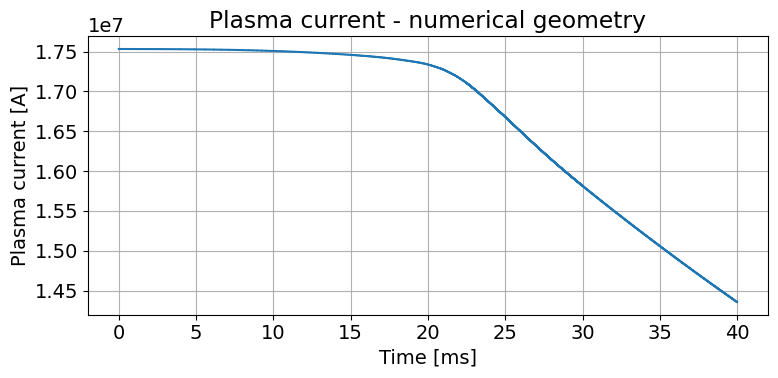

In [19]:
concat_1D(fnames, "eqsys/I_p", title="Plasma current - numerical geometry", ylabel="Plasma current [A]", savename="I_p")

In [4]:
do_a = DREAMOutput(root + folder_a + file_a)
do_n = DREAMOutput(root + folder_n + file_n)

cdo_a = CDO.CustomDREAMOutput(root + folder_a + file_a)
cdo_n = CDO.CustomDREAMOutput(root + folder_n + file_n)

cdo_a.info()
print("--------")
cdo_n.info()

Simulation time: 20.0 ms
Number of saved timesteps: 200
Save timestep (dt): 0.1 ms
Minor radius: [2.90322581] m
Number of radial grid cells: 50
Radial step (dr): 0.05806451612903226 m
Hottailgrid enabled: True
Runawaygrid enabled: False
--------
Simulation time: 20.0 ms
Number of saved timesteps: 200
Save timestep (dt): 0.1 ms
Minor radius: [2.93] m
Number of radial grid cells: 55
Radial step (dr): 0.05327272727272728 m
Hottailgrid enabled: True
Runawaygrid enabled: False


In [5]:
# help(cdo_a)

In [6]:
# cdo_a.list_attrs()

In [7]:
# cdo_n.list_attrs()

Text(0.5, 0, 'm$_e$c-hez normalizált lendület [-]')

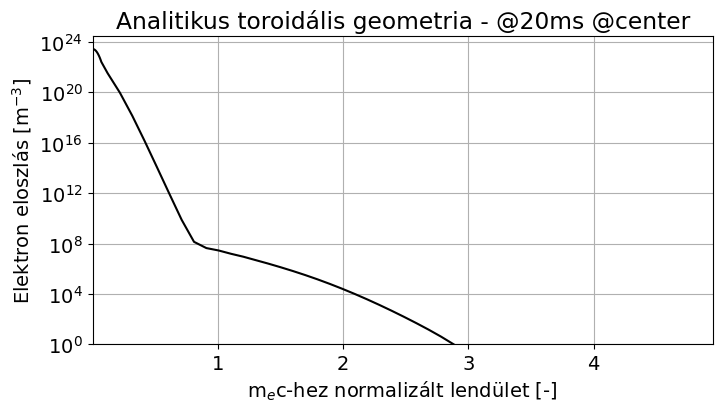

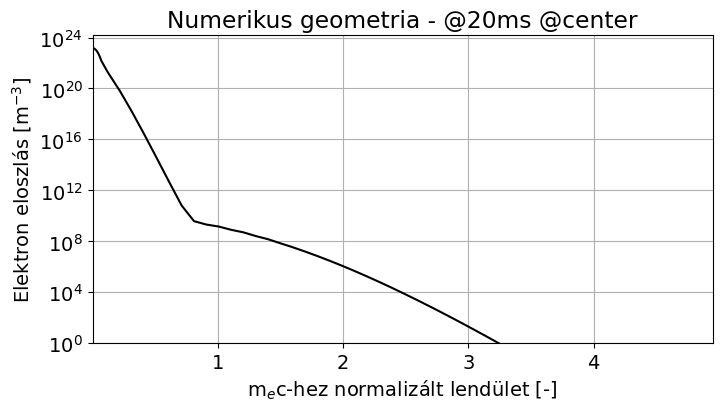

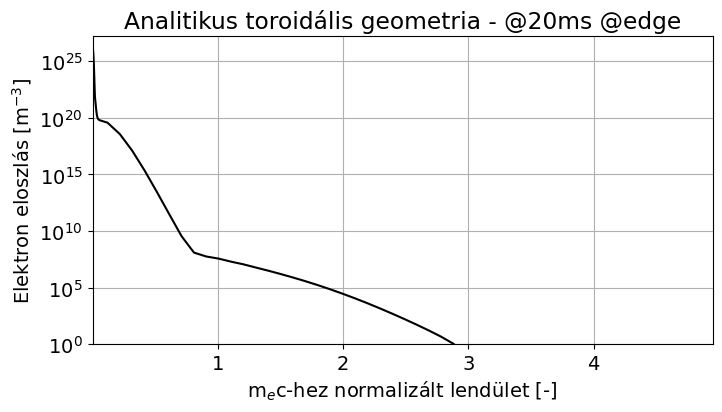

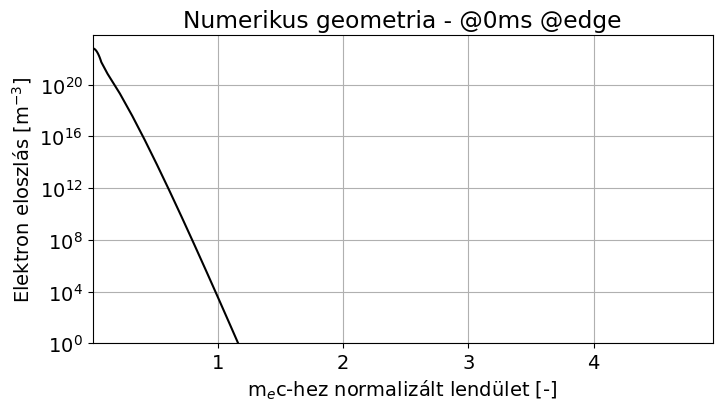

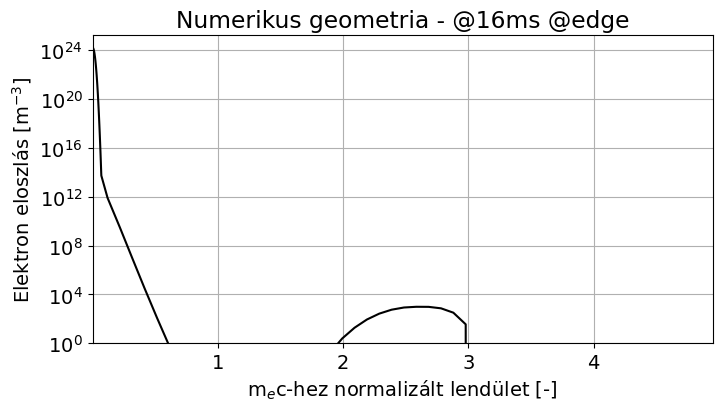

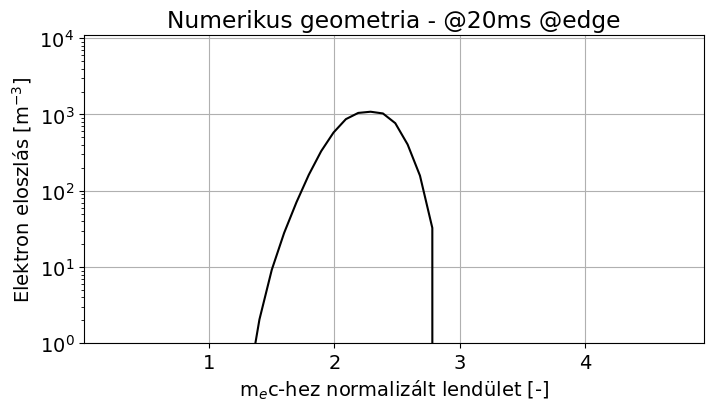

In [8]:
fig_a = plt.figure(figsize=[8,4])
axes = plt.gca()
do_a.eqsys.f_hot.semilog(t=-1, r=0, ax=axes)
axes.set_ylim(1, None)
axes.grid()
axes.set_title("Analitikus toroidális geometria - @20ms @center")
axes.set_ylabel(r"Elektron eloszlás [m$^{-3}$]")
axes.set_xlabel(r"m$_e$c-hez normalizált lendület [-]")

fig_n = plt.figure(figsize=[8,4])
axes = plt.gca()
do_n.eqsys.f_hot.semilog(t=-1, r=0, ax=axes)
axes.set_ylim(1, None)
axes.grid()
axes.set_title("Numerikus geometria - @20ms @center")
axes.set_ylabel(r"Elektron eloszlás [m$^{-3}$]")
axes.set_xlabel(r"m$_e$c-hez normalizált lendület [-]")

fig_a_edge = plt.figure(figsize=[8,4])
axes = plt.gca()
do_a.eqsys.f_hot.semilog(t=-1, r=-1, ax=axes)
axes.set_ylim(1, None)
axes.grid()
axes.set_title("Analitikus toroidális geometria - @20ms @edge")
axes.set_ylabel(r"Elektron eloszlás [m$^{-3}$]")
axes.set_xlabel(r"m$_e$c-hez normalizált lendület [-]")

fig_n_edge = plt.figure(figsize=[8,4])
axes = plt.gca()
do_n.eqsys.f_hot.semilog(t=0, r=-1, ax=axes)
axes.set_ylim(1, None)
axes.grid()
axes.set_title("Numerikus geometria - @0ms @edge")
axes.set_ylabel(r"Elektron eloszlás [m$^{-3}$]")
axes.set_xlabel(r"m$_e$c-hez normalizált lendület [-]")

fig_n_edge = plt.figure(figsize=[8,4])
axes = plt.gca()
do_n.eqsys.f_hot.semilog(t=-40, r=-1, ax=axes)
axes.set_ylim(1, None)
axes.grid()
axes.set_title("Numerikus geometria - @16ms @edge")
axes.set_ylabel(r"Elektron eloszlás [m$^{-3}$]")
axes.set_xlabel(r"m$_e$c-hez normalizált lendület [-]")

fig_n_edge = plt.figure(figsize=[8,4])
axes = plt.gca()
do_n.eqsys.f_hot.semilog(t=-1, r=-1, ax=axes)
axes.set_ylim(1, None)
axes.grid()
axes.set_title("Numerikus geometria - @20ms @edge")
axes.set_ylabel(r"Elektron eloszlás [m$^{-3}$]")
axes.set_xlabel(r"m$_e$c-hez normalizált lendület [-]")

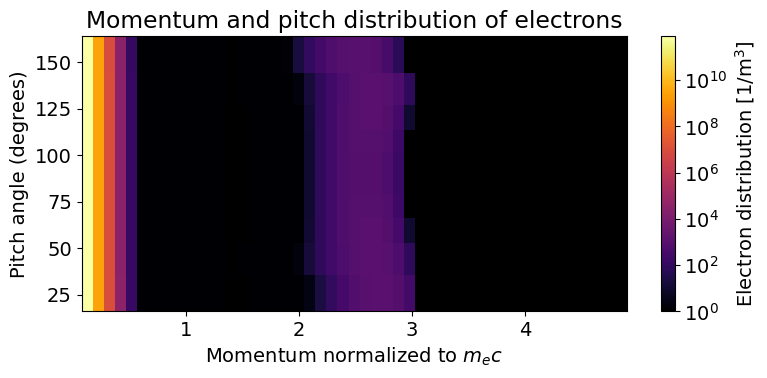

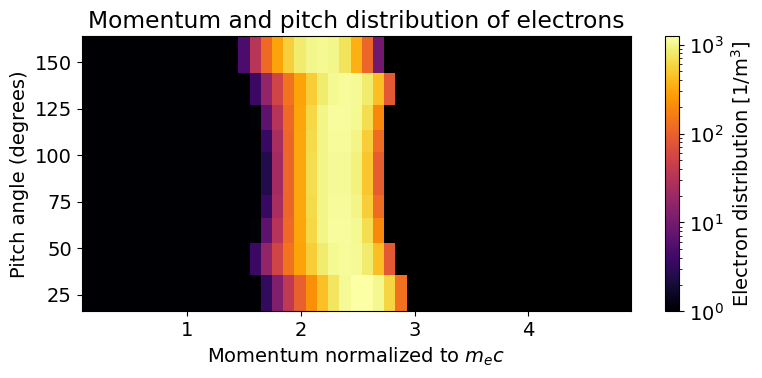

In [9]:
cdo_n.plot_2D_momentum(from_momentum_cell=70, at_radial_cell=-1, at_timestep=-40)
cdo_n.plot_2D_momentum(from_momentum_cell=70, at_radial_cell=-1, at_timestep=-10)

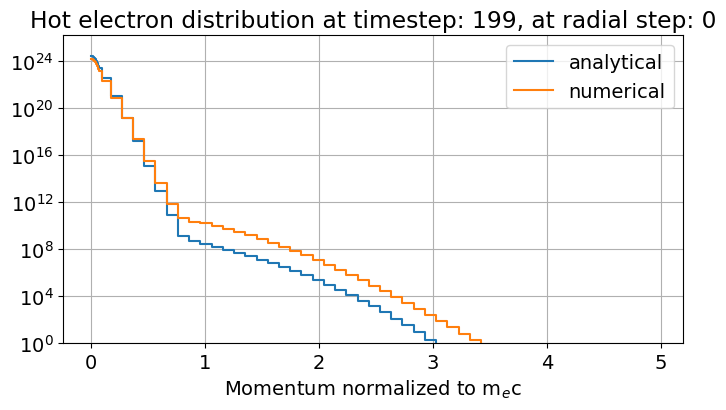

In [10]:
tt = 199
rr = 0
plot_2things(figsize=[8,4], ydata1=cdo_a.angle_avg_distr[0][tt, rr, :], ydata2=cdo_n.angle_avg_distr[0][tt, rr, :], 
             xdata=cdo_a.momentumgrid, ylabel=None, 
             xlabel=r'Momentum normalized to m$_e$c', y1label='analytical', y2label='numerical',
             title='Hot electron distribution at timestep: ' + str(tt) + ', at radial step: ' + str(rr), 
             yscale="log", ymin=1, ymax=None, savename=None)

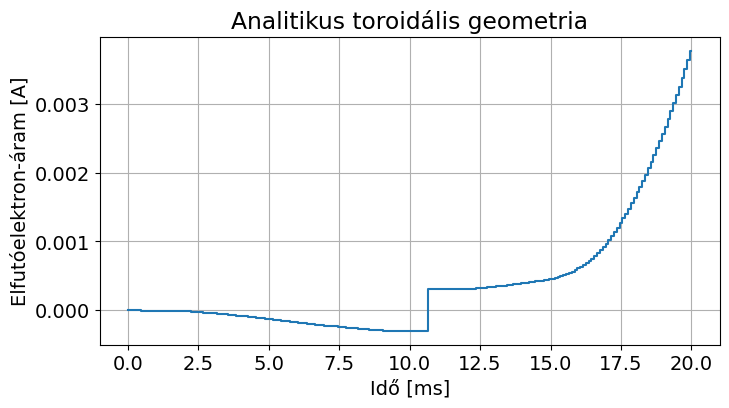

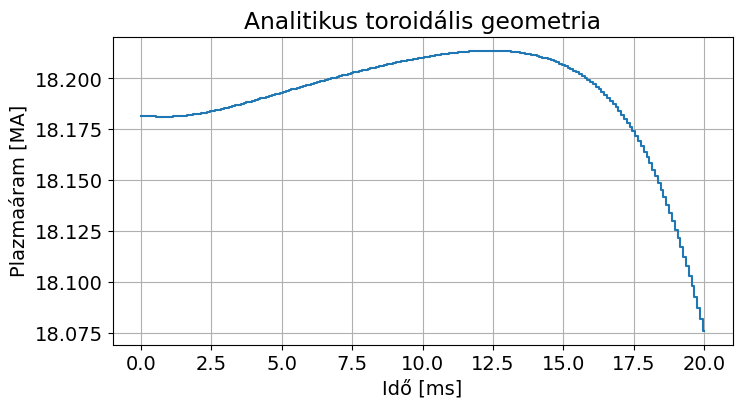

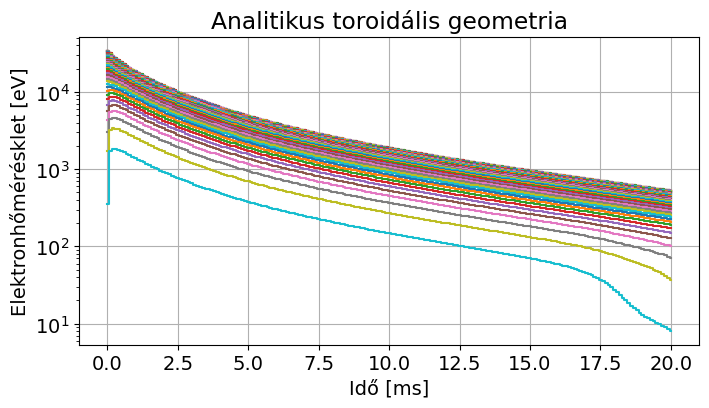

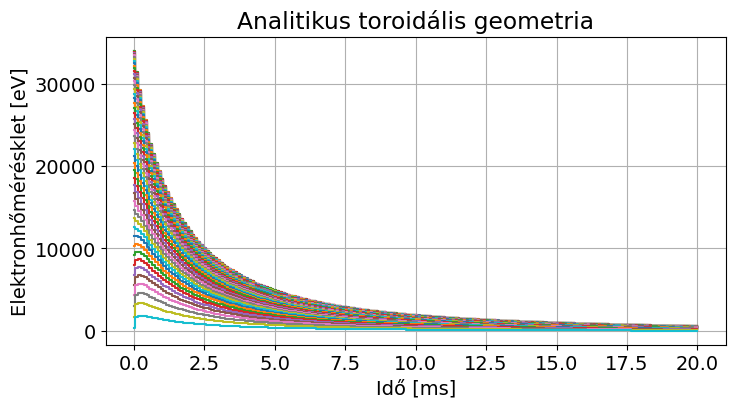

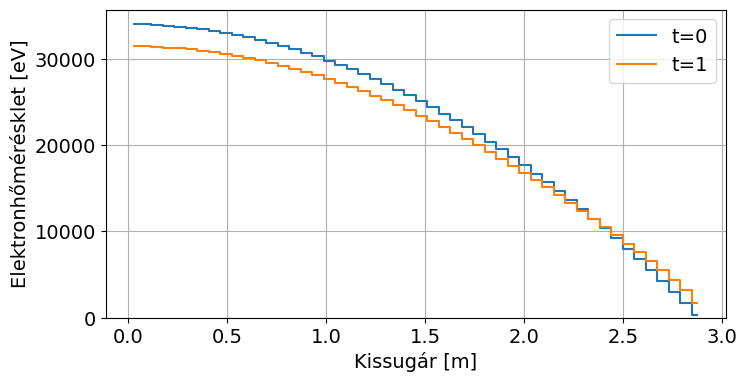

In [11]:
file = do_a
title = "Analitikus toroidális geometria"
basic_1D(ydata=file.eqsys.j_re.current(), xdata=file.grid.t * 1000, 
         ylabel="Elfutóelektron-áram [A]", xlabel="Idő [ms]",
         title=title)

# basic_1D(ydata=file.eqsys.j_tot.current() / 1e6, xdata=file.grid.t * 1000, 
#          ylabel="Teljes áram [MA]", xlabel="Idő [ms]", 
#          title=title)

basic_1D(ydata=file.eqsys.I_p.data / 1e6, xdata=file.grid.t * 1000, 
         ylabel="Plazmaáram [MA]", xlabel="Idő [ms]", 
         title=title)

basic_1D(ydata=file.eqsys.T_cold.data, xdata=file.grid.t * 1000, 
         ylabel="Elektronhőmérésklet [eV]", xlabel="Idő [ms]", yscale="log",
         title=title)

basic_1D(ydata=file.eqsys.T_cold.data, xdata=file.grid.t * 1000, 
         ylabel="Elektronhőmérésklet [eV]", xlabel="Idő [ms]", yscale="linear",
         title=title)

plot_2things(figsize=[8,4], ydata1=file.eqsys.T_cold.get(t=0), ydata2=file.eqsys.T_cold.get(t=1), 
             xdata=file.grid.r, ylabel="Elektronhőmérésklet [eV]", 
             xlabel="Kissugár [m]", y1label="t=0", y2label="t=1",
             title=None, yscale="linear", ymin=0, ymax=None, savename=None)

In [12]:
# help(file.eqsys.T_cold)

timegrid OK

radialgrid OK

log


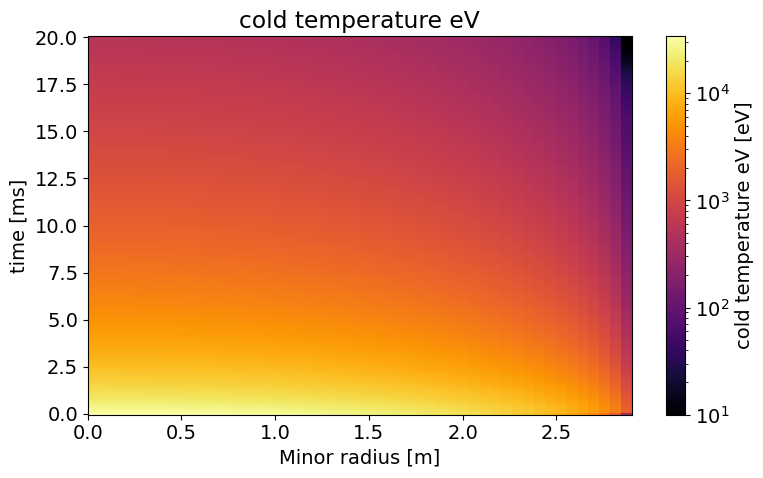

In [17]:
cdo_a.plot_2D('cold_temperature_eV', figsize=None, save=False, normalization='log', 
              datamin=None, datamax=None, logdiff=None)